# Name: Utsav Pudasaini



In [ ]:
import numpy as np
import pandas as pd

# 3.1:

## To-Do 1:

### Logistic function:

In [ ]:
def logistic_function(num1):
    """
    Computes the logistic function applied to any value of num1.
    Arguments:
    num1: scalar or numpy array of any size.
    Returns:
    num2: logistic function applied to num1.
    """
    num2 = 1 / (1 + np.exp(-num1))
    return num2

### Testing the function:

In [ ]:
import numpy as np
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Updated:  Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Updated:  Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
    
    # Updated:  Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Updated:  Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
    
    # Updated:  Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Updated:  Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"
    
    # Updated:  Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047]) # Updated:  Adjusted expected values rounded to 3 decimals
    
    # Updated:  Use np.round to round the array element-wise and compare
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
    print("All tests passed! (output)")
# Updated:  Run the test case
test_logistic_function()

All tests passed!


<br><br>
## To-Do 2:

### Log Loss function:

In [ ]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value num2 ={0 or 1} and predicted target value num2’ inbetween {0-1}.
    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
    Returns:
    loss (float): loss/error value
    """
    # Updated:  Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
    return loss

### Testing the function:

In [ ]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    # Updated:  Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0 # Updated:  Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
    
    # Updated:  Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0 # Updated:  Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"
    
    # Updated:  Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
    y_true = 1
    y_pred = 0
    try:
        log_loss(y_true, y_pred) # Updated:  This should raise an error due to log(0)
    except ValueError:
        pass # Updated:  Test passed if ValueError is raised for log(0)
    
    # Updated:  Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
    y_true = 0
    y_pred = 1
    try:
        log_loss(y_true, y_pred) # Updated:  This should raise an error due to log(0)
    except ValueError:
        pass # Updated:  Test passed if ValueError is raised for log(0)
    
    # Updated:  Test case 5: Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # Updated:  ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=1, y_pred=0.8)"
    y_true = 0
    y_pred = 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # Updated:  ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=0, y_pred=0.2)"
    print("All tests passed! (output)")

# Updated:  Run the test case
test_log_loss()

All tests passed!


<br><br>
## To-Do 3:

### Cost function:

In [ ]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.sum(loss_vec)/n
    return cost

### Testing the function:

In [ ]:
def test_cost_function():
    # Updated:  Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])
    # Updated:  Expected output: Manually calculate cost for these values
    # Updated:  log_loss(y_true, y_pred) for each example
    expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) + -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) + -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3
    
    # Updated:  Call the cost_function to get the total_sum
    total_sum = cost_function(y_true, y_pred)
    # Updated:  Assert that the total_sum is close to the expected cost with a tolerance of 1e-6
    assert np.isclose(total_sum, expected_cost, atol=1e-6), f"Test failed: {total_sum} != {expected_cost}"
    print("Test passed for simple case! (output)")
    
# Updated:  Run the test case
test_cost_function()

Test passed for simple case!


<br><br>
## To-Do 4:

### Vectorized Cost Function:

In [ ]:
# Updated:  Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, num2, w, b):
    """
    Computes the cost function, given info_data and model parameters.
    Args:
    X (ndarray, shape (m,n)): info_data on features, m observations with n features.
    num2 (array_like, shape (m,)): array of true values of target (0 or 1).
    w (array_like, shape (n,)): weight parameters of the model.
    b (float): bias parameter of the model.
    Returns:
    cost (float): nonnegative cost corresponding to num2 and y_pred.
    """
    n, d = X.shape
    assert len(num2) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."
    # Updated:  Compute z using np.dot
    z = np.dot(X, w) + b # Updated:  Matrix-vector multiplication and adding bias
    # Updated:  Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z) 
    # Updated:  Compute the cost using the cost function
    cost = cost_function(num2, y_pred)
    return cost

### Testing the function:

In [ ]:
# Updated:  Testing the Function:
X, num2, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, num2 = {num2}, w = {w}, b = {b}) = {costfunction_logreg(X, num2, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


<br><br>
## To-Do 5:

### Gradient Function:

In [ ]:
def compute_gradient(X, num2, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
    X (ndarray, shape (n,d)): Input info_data, n observations with d features
    num2 (array_like, shape (n,)): True labels (0 or 1)
    w (array_like, shape (d,)): Weight parameters of the model
    b (float): Bias parameter of the model
    Returns:
    grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight
    parameters
    grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape # Updated:  X has shape (n, d)
    assert len(num2) == n, f"Expected num2 to have {n} elements, but got {len(num2)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"
    # Updated:  Compute predictions using logistic function (sigmoid)
    z = X @ w + b
    y_pred = logistic_function(z)
    # Updated:  Compute gradients
    grad_w = (1 / n) * (X.T @ (y_pred - num2)) # Updated:  Gradient w.r.t weights, shape (d,)
    grad_b = (1 / n) * np.sum(y_pred - num2) # Updated:  Gradient w.r.t bias, scalar
    return grad_w, grad_b

### A simple assertion test for the function:

In [ ]:
# Updated:  Simple test case
X = np.array([[10, 20], [-10, 10]]) # Updated:  shape (2, 2)
num2 = np.array([1, 0]) # Updated:  shape (2,)
w = np.array([0.5, 1.5]) # Updated:  shape (2,)
b = 1 # Updated:  scalar
# Updated:  Assertion tests
try:
    grad_w, grad_b = compute_gradient(X, num2, w, b)
    print("Gradients computed successfully. (output)")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


<br><br>
## To-Do 6:

In [ ]:
def gradient_descent(X, num2, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    Args:
    X (ndarray, shape (n,d)): Data on features, n observations with d features
    num2 (array_like, shape (n,)): True values of target (0 or 1)
    w (array_like, shape (d,)): Initial weight parameters
    b (float): Initial bias parameter
    alpha (float): Learning rate
    n_iter (int): Number of iterations
    show_cost (bool): If True, displays cost every 100 iterations
    show_params (bool): If True, displays parameters every 100 iterations
    Returns:
    w (array_like, shape (d,)): Optimized weight parameters
    b (float): Optimized bias parameter
    cost_history (list): List of cost values over iterations
    params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(num2) == n, "Number of observations in X and num2 do not match"
    assert len(w) == d, "Number of features in X and w do not match"
    cost_history = []
    params_history = []
    for i in range(n_iter):
        # Updated:  Compute gradients
        grad_w, grad_b = compute_gradient(X, num2, w, b)
        
        # Updated:  Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b
        
        # Updated:  Compute predictions
        z = X @ w + b
        y_pred = 1 / (1 + np.exp(-z))

        # Updated:  Compute cost using your function
        cost = cost_function(num2, y_pred)
        
        # Updated:  Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))
        
        # Updated:  # Updated:  Optionally print cost and parameters
        # Updated:  if show_cost and (i % 100 == 0 or i == n_iter - 1):
        # Updated:      print(f"Iteration {i}: Cost = {cost:.6f}")
        # Updated:  if show_params and (i % 100 == 0 or i == n_iter - 1):
        # Updated:      print(f"Iteration {i}: w = {w}, b = {b:.6f}")
            
    return w, b, cost_history, params_history

### Testing the function:

In [ ]:
# Updated:  Test the gradient_descent function with sample info_data
X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Updated:  Shape (2, 2)
num2 = np.array([1, 0]) # Updated:  Shape (2,)
w = np.zeros(X.shape[1]) # Updated:  Shape (2,) - same as number of features
b = 0.0 # Updated:  Scalar
alpha = 0.1 # Updated:  Learning rate
n_iter = 100000 # Updated:  Number of iterations
# Updated:  Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, num2, w, b, alpha, n_iter, show_cost=True, show_params=False)
# Updated:  Print final parameters and cost
print("\nFinal parameters: (output)")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Final parameters:
w: [38.51304248 18.83386869], b: -2.8176836626325836
Final cost: 0.008254


### A simple assertion test for the function:

In [ ]:
# Updated:  Simple assertion test for gradient_descent
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Updated:  Shape (2, 2)
    num2 = np.array([1, 0]) # Updated:  Shape (2,)
    w = np.zeros(X.shape[1]) # Updated:  Shape (2,)
    b = 0.0 # Updated:  Scalar
    alpha = 0.1 # Updated:  Learning rate
    n_iter = 100 # Updated:  Number of iterations
    # Updated:  Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(X, num2, w, b, alpha, n_iter, show_cost=False,
    show_params=False)
    # Updated:  Assertions
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
    print("All tests passed! (output)")
    
# Updated:  Run the test
test_gradient_descent()

All tests passed!


<br><br>
## To-Do 7:

### Decision/Prediction Function:

In [ ]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.
    Arguments:
    X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d
    features.
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Updated:  Compute the predicted probabilities using the logistic function
    z = X @ w + b
    y_test_prob = logistic_function(z)
    
    # Updated:  Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)
    return y_pred

### Testing the function:

In [ ]:
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Updated:  Shape (3, 2)
    w_test = np.array([1.0, -1.0]) # Updated:  Shape (2,)
    b_test = 0.0 # Updated:  Scalar bias
    threshold = 0.5 # Updated:  Default threshold
    # Updated:  Updated expected output
    expected_output = np.array([0, 1, 1])
    # Updated:  Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)
    # Updated:  Assert that the output matches the expected output
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed! (output)")
test_prediction()

Test passed!


<br><br>
## To-Do 8:

In [ ]:
def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.
    Arguments:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).
    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """
    # Updated:  Initialize confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1)) # Updated:  True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0)) # Updated:  True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1)) # Updated:  False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Updated:  Confusion matrix
    confusion_matrix = np.array([[TN, FP],
    [FN, TP]])
    
    # Updated:  Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
    f1_score = (
        2 * precision * recall / (precision + recall)
        if (precision + recall) > 0.0 else 0.0
    )
    
    # Updated:  Metrics dictionary
    metrics = {
    "confusion_matrix": confusion_matrix,
    "precision": precision,
    "recall": recall,
    "f1_score": f1_score
    }
    
    return metrics

<br><br><br><br>
# 3.2:

## 1:

### Importing and Loading of dataset

In [ ]:
# Updated:  Load dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.info_data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)

### Some Basic Data Cleaning

In [ ]:
# Updated:  Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Summary Statistics

In [ ]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<br><br>
## 2. Training Test Split and Standard Scaling of the Data:

### Train - Test Split Followed by Standard Scaling:

In [ ]:
# Updated:  Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
num2 = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, num2, test_size=0.2, random_state=42, stratify=num2)

# Updated:  Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<br><br>
## 3. Training of the Sigmoid Regression:

### Training the model:


Training Logistic Regression Model:


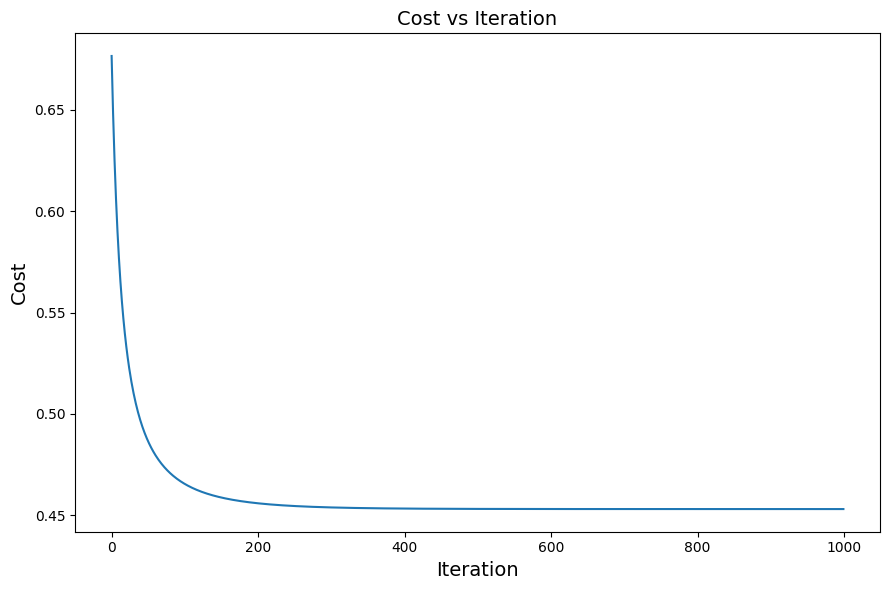

In [ ]:
# Updated:  Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

# Updated:  Train model
print("\nTraining Logistic Regression Model: (output)")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)
# Updated:  Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()

<br><br>
## 4. Did the Model Overfitt or Underfitt?

### Evaluating Train and Test Performance on Cost Value:

In [ ]:
# Updated:  Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

# Updated:  Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


<br><br>
## 5. How well my model did?

### Evalation on various Metrics for Classification:


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


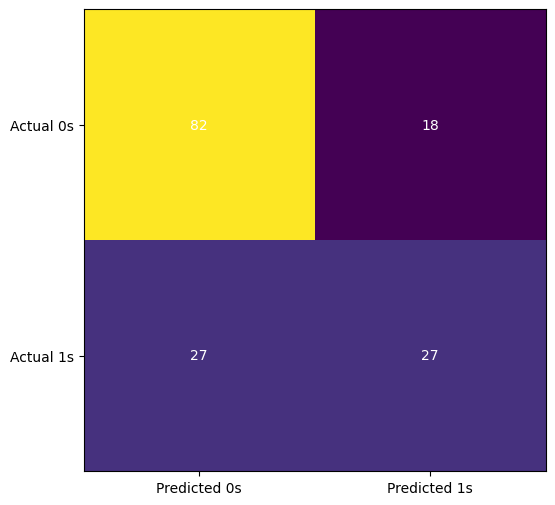

In [ ]:
# Updated:  Accuracy on test info_data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Updated:  Evaluation
metrics = evaluate_classification(y_test, y_test_pred)
confusion_matrix = metrics["confusion_matrix"]
precision = float(metrics["precision"])
recall = float(metrics["recall"])
f1_score = float(metrics["f1_score"])
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Updated: Optional - Visualizing the COnfusion matrix
# Updated:  Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')

plt.show()